In [1]:
import os
import math

import pandas as pd
import numpy as np

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from Jetson.autopilot.record.AutopilotGUI import AutopilotGUI

In [2]:
datasets_path = "../Jetson/autopilot/records/"
sub_dirs = os.listdir(datasets_path)
dataset_paths = [[datasets_path + sub_dir + "/" + sub_dir + ".csv", datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
dataset_paths

[['../Jetson/autopilot/records/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../Jetson/autopilot/records/Sun Dec 27 17_46_56 2020/frames/'],
 ['../Jetson/autopilot/records/Sun Dec 27 17_44_41 2020/Sun Dec 27 17_44_41 2020.csv',
  '../Jetson/autopilot/records/Sun Dec 27 17_44_41 2020/frames/']]

In [3]:
from RoadDataset import RoadDataset

In [4]:
dataset_index = 0
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
dataset = RoadDataset(dataset_paths[dataset_index][0], dataset_paths[dataset_index][1], column_names, mode='train')

Loaded dataset with 3775 samples


In [5]:
#dataset.pairplot()

In [6]:
dataset.clean()

Cleaning dataset. Starting with 3775 samples.
Removing 1290 rows for reason: Low speed (< 25 km/h)
Removing 71 rows for reason: High SWA (> +90/ < -90 deg)
Removing 90 rows for reason: Left blinker on
Removing 182 rows for reason: Right blinker on
2142 samples remaining.


In [7]:
#dataset.pairplot()

In [8]:
dataset.balance()

Balancing dataset. Starting with 2142 samples.
449 samples remaining.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


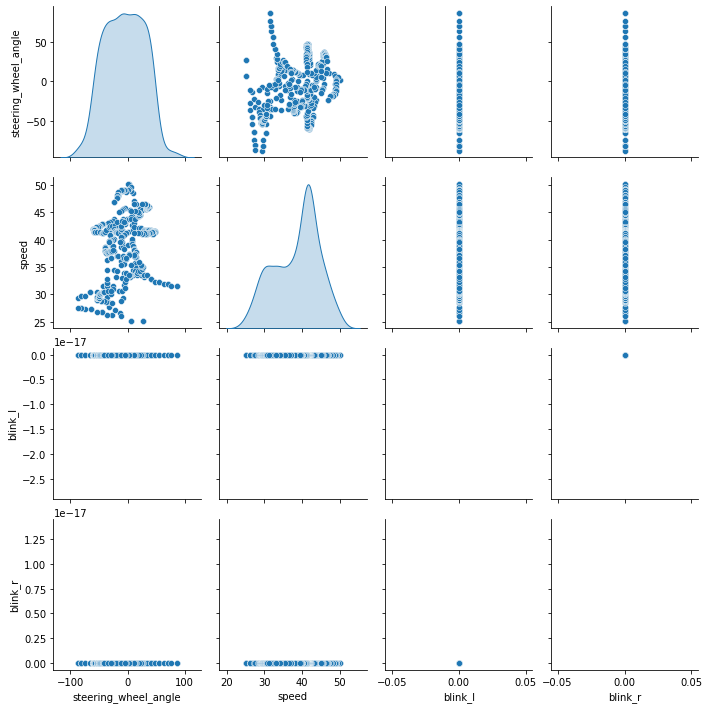

In [9]:
dataset.pairplot()

In [10]:
gui = AutopilotGUI()

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array

In [12]:
def show_frame(index):
    
    frame = img_to_array(dataset.get_frame(index)[0])
    gui.set_frame(frame)
    gui.set_show_overlay(True)
    gui.set_engaged(False)
    gui.set_recording(True)
    
    blink_l = dataset.get_indicator_left(index)
    print("blink_l: " + str(blink_l))
    gui.set_indicator_left(blink_l)
    #gui.set_indicator_right(indicator_right)
    #gui.set_cruise_control(cruise_control)
    #gui.set_cruise_control_setpoint(cc_setpoint)
    
    velocity = dataset.get_velocity(index)
    gui.set_velocity(velocity)
    
    timestamp = dataset.get_timestamp(index)
    gui.set_timestring(timestamp)
    
    
    actual_swa = dataset.get_swa(index)
    print("actual_swa: " + str(actual_swa))
    gui.set_actual_swa(actual_swa)
    #gui.set_predicted_swa(predicted_swa)
    
    gui.show_jupyter()

In [13]:
import ipywidgets as widgets
frame_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()*len(dataset)-1, continuous_update=False)

In [14]:
from ipywidgets import interact

interact(show_frame, index=frame_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=447), Output()), _d…

In [15]:
train_stats = dataset.get_csv().describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,449.0,-5.772606,34.238329,-87.400,-33.810,-6.640,21.470,86.150
speed,449.0,38.569385,5.935386,25.048,33.635,41.044,42.346,50.158
blink_l,449.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
blink_r,449.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [16]:
dataset.get_batch_labels(0)

array([  6.26,   6.26,   8.2 ,   8.45,   8.95,   0.75,  -4.07,  -5.2 ,
        -7.64, -20.29, -21.16, -21.91, -30.37, -30.37, -31.12, -31.12])

In [17]:
feature_batch = dataset.get_batch_features(0)
feature_batch

array([[[[ 17.,   2.,   7.],
         [ 17.,   2.,   5.],
         [ 17.,   2.,   5.],
         ...,
         [  9.,   4.,   8.],
         [  9.,   5.,   2.],
         [ 11.,   8.,   1.]],

        [[ 17.,   2.,   7.],
         [ 17.,   2.,   5.],
         [ 16.,   1.,   4.],
         ...,
         [  8.,   3.,   7.],
         [  8.,   4.,   3.],
         [ 10.,   7.,   2.]],

        [[ 18.,   3.,   8.],
         [ 17.,   2.,   7.],
         [ 16.,   1.,   4.],
         ...,
         [  9.,   4.,   8.],
         [  4.,   0.,   0.],
         [ 11.,   8.,   3.]],

        ...,

        [[  3.,   4.,   0.],
         [  4.,   5.,   0.],
         [  8.,   3.,   7.],
         ...,
         [  3.,   2.,   0.],
         [  4.,   3.,   1.],
         [  4.,   3.,   1.]],

        [[  1.,   2.,   0.],
         [  3.,   3.,   1.],
         [  7.,   2.,   6.],
         ...,
         [  8.,   4.,   3.],
         [  7.,   6.,   4.],
         [  6.,   5.,   3.]],

        [[  3.,   4.,   0.],
       

In [18]:
batch_count = len(dataset)
batch_count

28